<a href="https://colab.research.google.com/github/hamidkhadem/face-detector-p22089/blob/main/Face_detect_From_Webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection of Persons by webcam:
In this notebook, I defined two functions, *photo_shot() and draw_face_boxes()*. First one for connect colab to webcam and create a phot and other for draw a box around the detected face by haar cascade algorithms from OpenCV lib. 

## Import python library and package that need for this Tasks.

In [24]:
# import lib for webcam connection
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
# import lib for show image and face detection7
import cv2
from google.colab.patches import cv2_imshow

## Function that connect colab to webcam and take a photo

In [25]:
# defined a function to connect to webcam and take a photo
# this function get to input with default value, filename is the name that photo saves
def photo_shot(filename='photo.jpg', quality=0.8):
  # create a javascript object to connect webcam
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  # save a image with the desired filename
  with open(filename, 'wb') as f:
    f.write(binary)
  
  return filename

## Function that draw a red box around detected face

I use this command to create a haar cascade frontal face ditection object to find location of face in image.
```
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
```

In [26]:
def draw_face_boxes(image_name='photo.jpg'):
    # read a image
    image = cv2.imread(image_name)
    # initialize the Haar Cascade face detection model
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # need to change image from 3 channel to 1 for cascade face detector
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces: 
      cv2.rectangle(image, (x,y), (x+w, y+h), (0,0, 255), 2)
    cv2_imshow(image)

## Run and Test Code: 

<IPython.core.display.Javascript object>

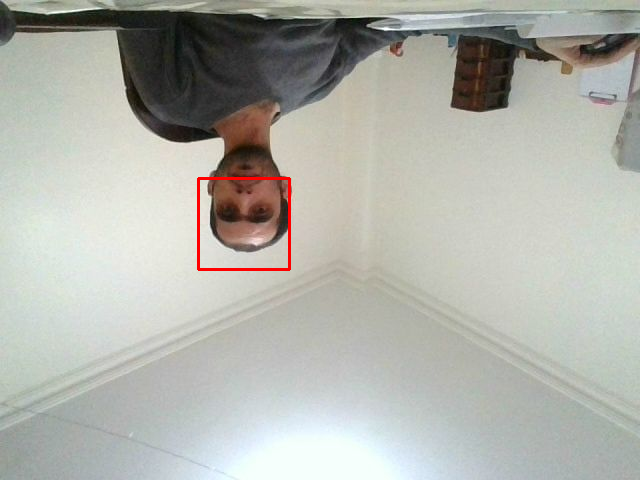

In [27]:
# First by photo_shot function connect to webcam and create a photo
image_raw = photo_shot()
# draw a box with haar cascade and show image
draw_face_boxes()